# Zero lift angle of attack of a finite wing - graphic method


Let us import the necessary libraries first : 
    

In [20]:
database = import_database_aerodynamic_center()
%matplotlib inline
%run ./resources/init.py

Let us assign the wing planform shape, i.e. let us assume given values of wing span $b$,tip chord lenght $c_\mathrm{t}$ and root chord lenght $c_\mathrm{r}$ .
In Python we define the following variables:

In [21]:
b=26.8
Lambda_le = 27.5/(180/math.pi)
c_r=5.20
c_t=1.6
taper=c_t/c_r
t_c_t=0.09
t_c_r=0.1500
alpha0l_r = -3/(180/math.pi)
alpha0l_t = -1.5/(180/math.pi)
eps_t = -1.5/(180/math.pi)
M=0.70

For this excercise we will consider as known the following values : $\alpha_{0\ell,r}$,  $\alpha_{0\ell,t}$ ,  $\epsilon_{g,t}$ , and flight speed in Mach.

In [22]:
Latex(r'\begin{array}{ll}'
       +  r'\text{root chord,}\, c_{\mathrm{r}}: & ' + r'{0}'.format(c_r) + r'\,\text{m}'
       +  r'\\'
       +  r'\text{tip chord,}\, c_{\mathrm{t}}: & ' + r'{0}'.format(c_t) + r'\,\text{m}'
       +  r'\\'
       +  r'\text{semispan,}\, \frac{1}{2}b: & ' + r'{0:.4}'.format(b/2) + r'\,\text{m}'
       +  r'\\'   
       +  r'\text{leading edge sweep angle,}\, \Lambda_{\mathrm{le}}: &' 
          + r'{0:.4}'.format(Lambda_le*180/math.pi) + r'\,\text{deg}'
       +  r'\\'
       +  r'\text{tip section geometric twist,}\, \epsilon_{\mathrm{g,t}}: & ' 
          + r'{0:.4}'.format(eps_t*180/math.pi) + r'\,\text{deg}'
       +  r'\\'
       +  r'\text{root profile zero-lift angle of attack,}\, \alpha_{0\ell,\mathrm{r}}: & ' 
          + r'{0:.4}'.format(alpha0l_r*180/math.pi) + r'\,\text{deg}'
       +  r'\\'
       +  r'\text{tip profile zero-lift angle of attack,}\, \alpha_{0\ell,\mathrm{t}}: & ' 
          + r'{0:.4}'.format(alpha0l_t*180/math.pi) + r'\,\text{deg}'
     + r'\end{array}')

<IPython.core.display.Latex object>

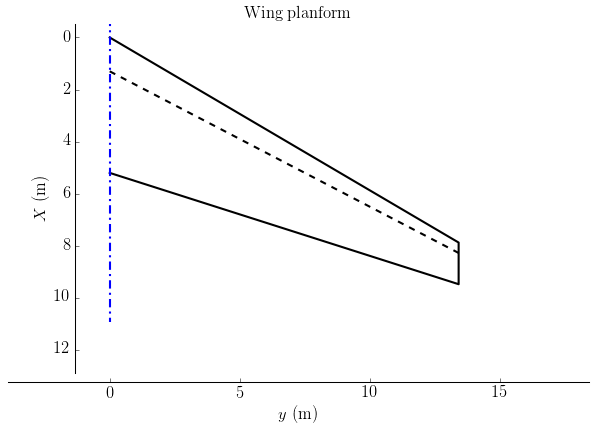

In [23]:
plot_planform_sweep(c_r, c_t, b, Lambda_le)

Let us calculate the zero lift angle of attack of a finite wing with the following empiric formula : 

\begin{equation}
\alpha_{0L} = \big(\bar{\alpha}_{0\ell} + K_{\alpha,1}  \epsilon_{g,t}\big)K_{\alpha,2}
\end{equation}

in wich we define $\bar{\alpha}_{0\ell}$ as :

\begin{equation}
\bar{\alpha}_{0\ell} 
  = \frac{2}{S} \int_0^{b/2} 
    \alpha_{0\ell}(Y)
    c(Y) \, \mathrm{d}Y
\end{equation}

This is the mean value of zero lift angle of section. The $K_{\alpha,1}$  factor is conceptually $\Delta_{\alpha0L}/\epsilon_{g,t}$ that reads from the figure 1,  and it is function of the sweep angle $\Lambda_{c/4}$, the aspect ratio $AR$ and the ratio of taper $\lambda$. The $K_{\alpha,2}$  factor is a correction factor due to the possible effects of compressibility,it reads from the figure 2 and it is function of the flight mach number $M$,specifically of $Mcos\Lambda_{c/4}$ , and thickness product percentage of profiles $\overline{(t/c)}$.

The function $c(y)$ is the linear law that gives the chord at the generic spanwise station $y\in \big[0,\frac{1}{2}b\big]$. This has the form

\begin{equation}
%\label{eq:ChordsLaw}
c(y) = A_c \, y + B_c
\end{equation}

with 

\begin{equation}
%\label{eq:ChordsLawAB}
A_c = \frac{(c_{\mathrm{t}} - c_{\mathrm{r}})}{b\,/\,2}
  \,\,,\,\, 
  B_c = c_{\mathrm{r}}
\end{equation}

Let us calculate the above two coefficients with this code 

In [24]:
A_c = (c_t - c_r)/(b/2); B_c = c_r;
print("A_c: {0:.3}\nB_c: {1} m".format(A_c,B_c))

A_c: -0.269
B_c: 5.2 m


and the function c(y) becomes:

In [25]:
display(Math(r'c(y) :\,' + '{0:.3}'.format(A_c) + '\,y + ' + '{0:.3}'.format(B_c) + r'\,\text{m}'))

<IPython.core.display.Math object>

The law of $\alpha_{0\ell}$ is :
\begin{equation}
\alpha_{0\ell}=A_{\alpha}Y+B_{\alpha}
\end{equation}

Let us calculate these coefficient

\begin{equation}
A_{\alpha} = \frac{2}{b} \left( \alpha_{0\ell,\mathrm{t}} - \alpha_{0\ell,\mathrm{r}} \right)
  \;\;,\qquad 
B_{\alpha} = \alpha_{0\ell,\mathrm{r}}
\end{equation}

Let us calculate the above two coefficients with this code 

In [26]:
A_alpha = 2*(alpha0l_t - alpha0l_r)/b; 
B_alpha = alpha0l_r;
print("A_alpha: {0:.4} rad/m\nB_alpha: {1:.4} rad".format(A_alpha,B_alpha))

A_alpha: 0.001954 rad/m
B_alpha: -0.05236 rad


and the function $\alpha_{0\ell}(y)$ becomes:

In [27]:
display(Math(
        r'\alpha_{0\ell}(y) =\,' + '{0:.4}'.format(A_alpha) + r'\frac{\text{rad}}{\text{m}} \,y ' 
        + '{0:.4}'.format(B_alpha) + r'\,\text{rad}'))

<IPython.core.display.Math object>

The thickness profile percentage law is obtained similarly,by placing $ (t/c) (Y) = A_{t/c}Y + B_{t/c}Y $, with

\begin{equation}
A_{t/c} = \frac{(t/c)_t - (t/c)_r}{b/2}   \,\,,\,\, 
B_{t/c} = (t/c)_r
\end{equation}

Let us calculate the above two coefficients with this code 

In [28]:
A_t = (t_c_t - t_c_r)/(b/2); B_t = t_c_r;
print("A_(t/c): {0:.3}\nB_(t/c): {1} m".format(A_t,B_t))

A_(t/c): -0.00448
B_(t/c): 0.15 m


and the law becomes

In [29]:
display(Math(r'(t/c)(y) :\,' + '({0:.3}'.format(A_t) + r')\text{m}^{-1}\,y + ' + '{0:.3}'.format(B_t) + r'\,\text{m}'))

<IPython.core.display.Math object>

About this wing, we can also calculate :

- the taper ratio of this wing 
\begin{equation}
\lambda = \frac{ c_{\mathrm{t}} }{ c_{\mathrm{r}} }
\end{equation}

that becomes : 

In [30]:
taper_ratio = c_t/c_r
display(Math(r'\text{taper ratio:}\quad \lambda = '+ '{0:.3}'.format(taper_ratio)))

<IPython.core.display.Math object>

- the reference wing area, given by the formula

\begin{equation}
S=( c_{\mathrm{r}} + c_{\mathrm{t}} )\,\frac{1}{2} b
\end{equation}

becomes

In [31]:
S_ref = (c_r + c_t)*b/2
display(Math(r'\text{surface:}\quad S = '+ '{0:.4}'.format(S_ref) +'\,\mathrm{m}^2'))

<IPython.core.display.Math object>

- the aspect ratio
\begin{equation}
%\label{eq:AspectRatio}
\text{AR} = \frac{ b^2 }{ S }
\end{equation}

becomes :

In [32]:
AR = b*b/S_ref
display(Math(r'\text{aspect ratio:}\quad \text{AR} = '+ '{0:.4}'.format(AR)))

<IPython.core.display.Math object>

- $\Lambda_\mathrm{c/4}$ by using the generic "n" formula :

\begin{equation}
\text{tan}\,\Lambda_{c/n} = \text{tan}\,\Lambda_{le}\,-\,\frac{(4/n)(1-\lambda)}{\text{AR}(1+\lambda)}
\end{equation}

In [33]:
tan_lambda_4 = math.tan(Lambda_le) - ((4/4)*(1-taper_ratio))/(AR*(1+taper_ratio))
lambda_4=math.atan(tan_lambda_4)
display(Math('\Lambda_\mathrm{c/4}'+' = {0:.4} \,rad'.format(lambda_4)+' = {0:.4} \,°'.format(lambda_4*180/math.pi)))

<IPython.core.display.Math object>

We can now calculate the mean values : 

- $\bar{\alpha}_{0\ell} $

\begin{equation}
\bar{\alpha}_{0\ell}  = 
\frac{2}{S} \int_0^{b/2} \alpha_{0\ell}(y) c(y) \, \text{d}y = \frac{2}{S} \int_0^{b/2} \Big (A_{\alpha}Y + B_{\alpha} \Big) \Big( A_c \, y + B_c \Big) \, \text{d}y 
\end{equation}


In [34]:
alpha0L=integrate_alfa_0l_mean(A_alpha,B_alpha,A_c,B_c,b,S_ref)[0]
display(Math(r'\bar{\alpha}_\mathrm{0L,w} = '+ '{0:.4}'.format(alpha0L) +'\,\mathrm{rad} \, = ' + '{0:.4}'.format(alpha0L*180/math.pi)+'\,\mathrm{deg}'))

<IPython.core.display.Math object>

here there is presented the full workflow :

In [35]:
display_workflow_alpha0L_bar(b, S_ref, A_c, B_c, A_alpha, B_alpha,
                             alpha0L_law_integral_indefinite,
                             alpha0L)

NameError: name 'alpha0L_law_integral_indefinite' is not defined

- $\overline{(t/c)}$


\begin{equation}
\overline{(t/c)} = 
\frac{2}{S} \int_0^{b/2} (t/c)(y) c(y) \, \text{d}y = \frac{2}{S} \int_0^{b/2} \Big (A_{t/c}Y + B_{t/c} \Big) \Big( A_c \, y + B_c \Big) \, \text{d}y 
\end{equation}


In [41]:
mean_thick=thickness(A_t,B_t,A_c,B_c,b,S_ref)[0]
display(Math(r'\overline{t/c}\, = '+ '{0:.4}'.format(mean_thick)))



<IPython.core.display.Math object>

here there is presented the full workflow :

In [43]:
display_workflow_alpha0L_thick(b, S_ref, A_c, B_c, A_t, B_t,
                             thick_law_integral_indefinite,
                             mean_thick)

<IPython.core.display.Latex object>

Database non presente